In [14]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='charges'>

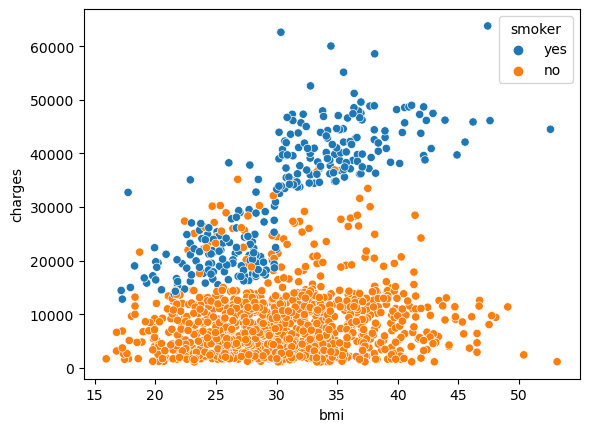

In [17]:
# Explore data
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker")

In [18]:
# More exploration
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
# Split into trian and test datasets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 332 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
 6   charges   936 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.5+ KB


In [20]:
# Consider only smoker data
smokers = train_df[train_df.smoker == 'yes']
nonsmokers = train_df[train_df.smoker == "no"]

In [21]:
# Oooo big correlation between smokers and charges
smokers.corr()

,age,bmi,children,charges
age,1.000000,0.057571,0.160216,0.374624
bmi,0.057571,1.000000,-0.044686,0.791993
children,0.160216,-0.044686,1.000000,0.028997
charges,0.374624,0.791993,0.028997,1.000000


In [22]:
nonsmokers.corr()

,age,bmi,children,charges
age,1.000000,0.119482,0.038226,0.627591
bmi,0.119482,1.000000,0.005704,0.089333
children,0.038226,0.005704,1.000000,0.139959
charges,0.627591,0.089333,0.139959,1.000000


In [24]:
# Train model
def trainModel(trainDF, x, y):
    slopes = []
    for i in range(len(trainDF)):
        slope = (trainDF.iloc[i]["charges"] - y) / (trainDF.iloc[i]["bmi"] - x)
        slopes.append(slope)
    
    return sum(slopes)/len(slopes)
b = 10000
m = trainModel(smokers, 0, b)
print("y = " + str(m) + "x + " + str(b))

y = 678.4007952598976x + 10000


In [24]:
# Determine how well model did
def testModel(testDF, m, b):
    checks = []
    for i in range(len(testDF)):
        predicted = (m*testDF.iloc[i]["bmi"] + b)
        actual = (testDF.iloc[i]["charges"])
        difference = abs(predicted - actual)
        if difference <= 1000:
            checks.append(1)
        else:
            checks.append(0)
    return (checks.count(1) / len(checks)) * 100

print(testModel(test_df, m, b)) # Not great. :( 

1.7412935323383085
